In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score,median_absolute_error
from scipy import stats
import statsmodels.api as sm
from scipy.stats import boxcox
from itertools import combinations_with_replacement
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold

In [19]:
final_df=pd.read_excel('Encoded_movie_data_cleaned.xlsx')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_searched                    1359 non-null   object 
 1   domestic_opening                  1359 non-null   int64  
 2   post_score                        1359 non-null   int64  
 3   budget_x                          1359 non-null   int64  
 4   num_comments                      1359 non-null   int64  
 5   Comment_volume                    1359 non-null   int64  
 6   year                              1359 non-null   int64  
 7   WeightedAvg_Pos_Sentiment         1359 non-null   float64
 8   WeightedAvg_Neg_Sentiment         1359 non-null   float64
 9   WeightedAvg_Neut_Sentiment        1359 non-null   float64
 10  postive_Neut_ratio                1359 non-null   float64
 11  negative_Neut_ratio               1359 non-null   float64
 12  big_pr

In [20]:
final_df.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,domestic_opening,post_score,budget_x,num_comments,Comment_volume,year,WeightedAvg_Pos_Sentiment,WeightedAvg_Neg_Sentiment,WeightedAvg_Neut_Sentiment,postive_Neut_ratio,...,Rating Category_Other,Rating Category_Teens+,runtime_category_<100,runtime_category_100-120,runtime_category_121-150,runtime_category_150+,qtr_1,qtr_2,qtr_3,qtr_4
count,1.359000e+03,1359.000000,1.359000e+03,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,...,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,1.489095e+07,3871.237675,4.005122e+07,632.967623,184.766004,2017.698308,0.292887,0.249631,0.311051,1.538733,...,0.020603,0.313466,0.352465,0.397351,0.220751,0.029433,0.192053,0.239882,0.264901,0.303164
std,3.082043e+07,9938.790042,6.152406e+07,1376.057069,191.862313,3.094761,0.199625,0.170871,0.165441,6.881462,...,0.142105,0.464073,0.477914,0.489530,0.414905,0.169080,0.394060,0.427169,0.441443,0.459795
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.442760e+03,0.000000,0.000000e+00,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.069980e+04,2.000000,0.000000e+00,1.000000,0.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.025550e+04,31.000000,0.000000e+00,13.500000,7.000000,2015.000000,0.168752,0.142977,0.255288,0.408822,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.843347e+06,287.000000,1.300000e+07,108.000000,91.000000,2017.000000,0.290317,0.247887,0.346829,0.729485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.656829e+07,1941.000000,5.000000e+07,510.000000,444.000000,2020.000000,0.406299,0.353912,0.416535,1.180039,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
90%,4.116619e+07,12909.800000,1.300000e+08,1925.600000,471.000000,2022.200000,0.534969,0.461471,0.473218,1.918950,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
final_df[final_df['domestic_opening']>10000].shape

(1228, 35)

In [22]:
final_df[final_df['post_score']>0].shape

(1303, 35)

In [23]:
final_df['pos_cmnts_per'] = np.where(
    final_df['Comment_volume'] > 0,
    final_df['Positive_Comments'] / final_df['Comment_volume'],
    0  
)

final_df['neg_cmnts_per'] = np.where(
    final_df['Comment_volume'] > 0,
    final_df['Negative_Comments'] / final_df['Comment_volume'],
    0  
)


In [24]:
final_df['big_production'] = final_df['big_production'].astype(int)

In [25]:
final_df1 = final_df[final_df['domestic_opening']>0]

In [26]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1358
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_searched                    1357 non-null   object 
 1   domestic_opening                  1357 non-null   int64  
 2   post_score                        1357 non-null   int64  
 3   budget_x                          1357 non-null   int64  
 4   num_comments                      1357 non-null   int64  
 5   Comment_volume                    1357 non-null   int64  
 6   year                              1357 non-null   int64  
 7   WeightedAvg_Pos_Sentiment         1357 non-null   float64
 8   WeightedAvg_Neg_Sentiment         1357 non-null   float64
 9   WeightedAvg_Neut_Sentiment        1357 non-null   float64
 10  postive_Neut_ratio                1357 non-null   float64
 11  negative_Neut_ratio               1357 non-null   float64
 12  big_pr

In [27]:
X = final_df1.drop(['domestic_opening','postive_Neut_ratio','negative_Neut_ratio','WeightedAvg_Neut_Sentiment',
                   'movie_searched','Comment_volume','Positive_Comments','Negative_Comments']
                   , axis=1)  # Features
y = final_df1['domestic_opening']  # Target variable

# Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a baseline model(Linear Regression)

In [29]:
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print("Cross-validated scores:", scores)
print("Average MSE:", -np.mean(scores))
print("Average RMSE:", np.sqrt(-np.mean(scores)))



Cross-validated scores: [-4.72850984e+14 -3.87561850e+14 -4.81976889e+14 -1.66112742e+14
 -2.77620082e+14]
Average MSE: 357224509524536.75
Average RMSE: 18900383.845957648


In [30]:
model.fit(X_train, y_train)  # Fit model on the entire training data
y_tr_pred = model.predict(X_train) 
residuals_tr = y_train - y_tr_pred

## checking residual plots for model assumptions

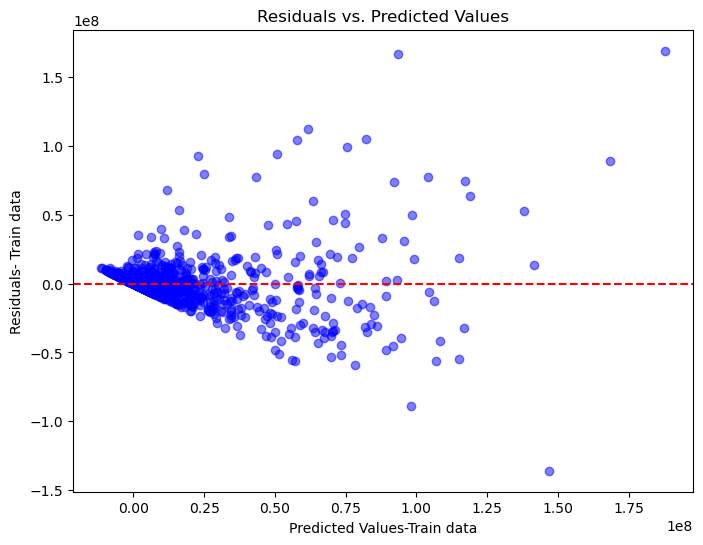

In [31]:

plt.figure(figsize=(8, 6))
plt.scatter(y_tr_pred, residuals_tr, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Predicted Values')
plt.show()

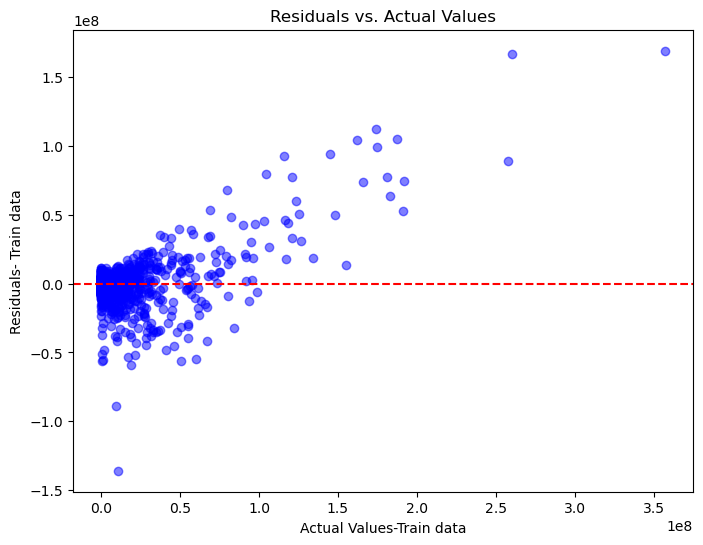

In [32]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals_tr, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Actual Values')
plt.show()

 ### Need to transform the target variable

## plotting residuals vs continuous variables

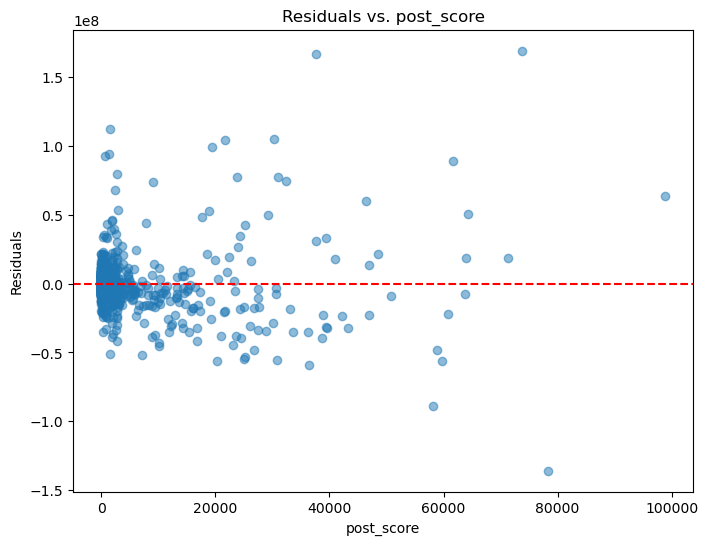

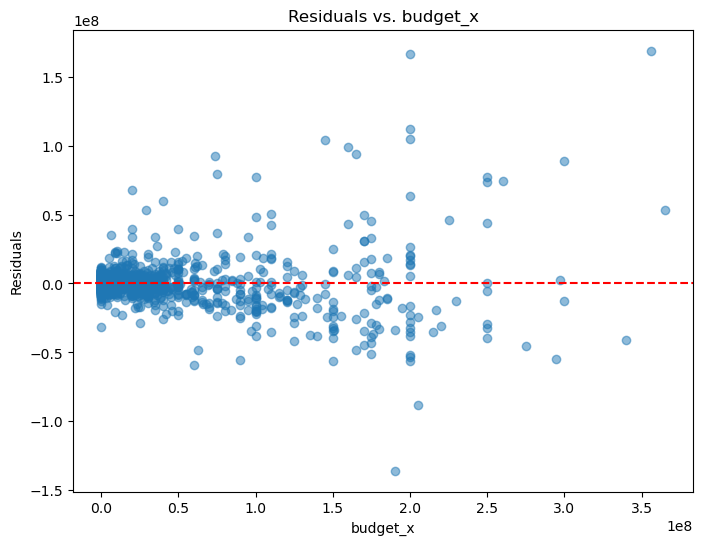

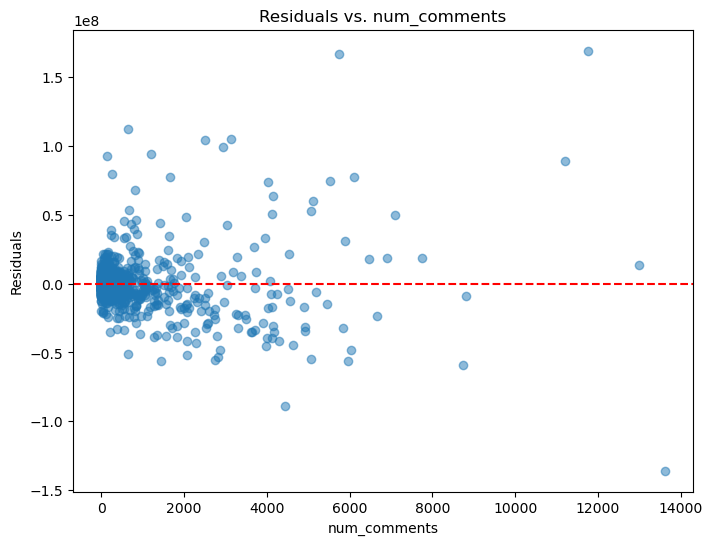

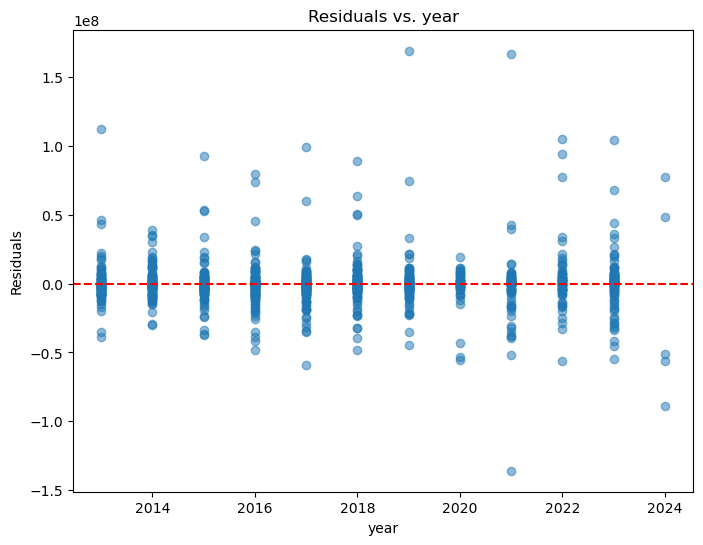

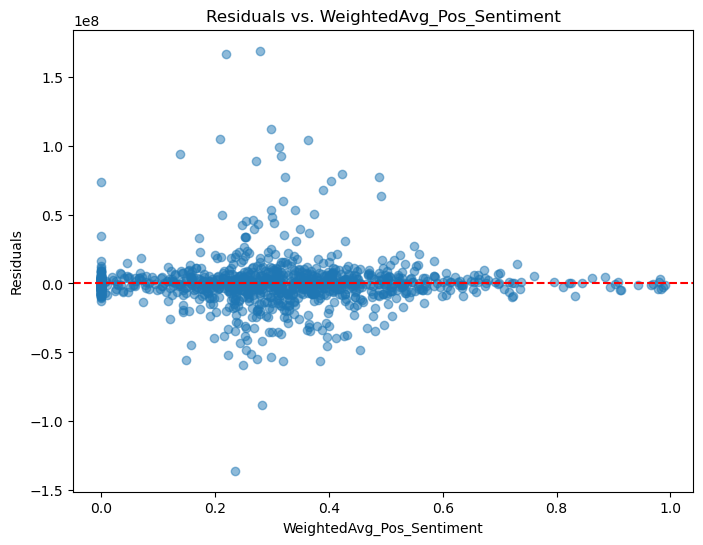

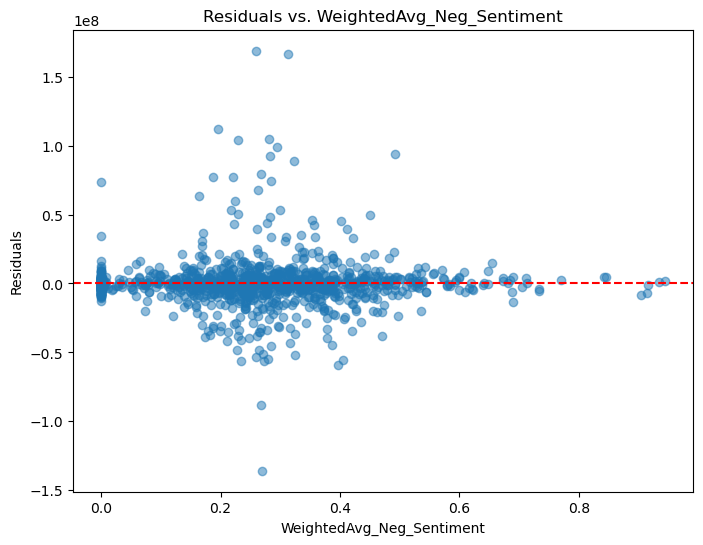

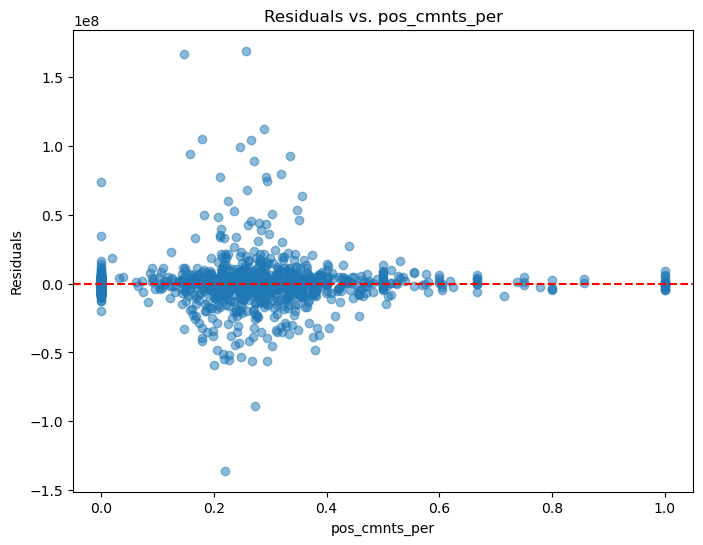

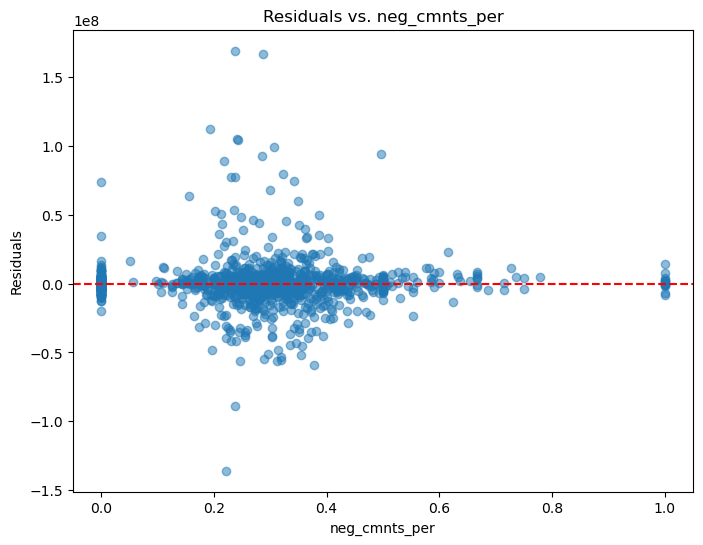

In [33]:
numerical_variables = ['post_score','budget_x','num_comments','year',
                      'WeightedAvg_Pos_Sentiment','WeightedAvg_Neg_Sentiment',
                       'pos_cmnts_per','neg_cmnts_per']

for column in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[column], residuals_tr, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {column}')
    plt.show()

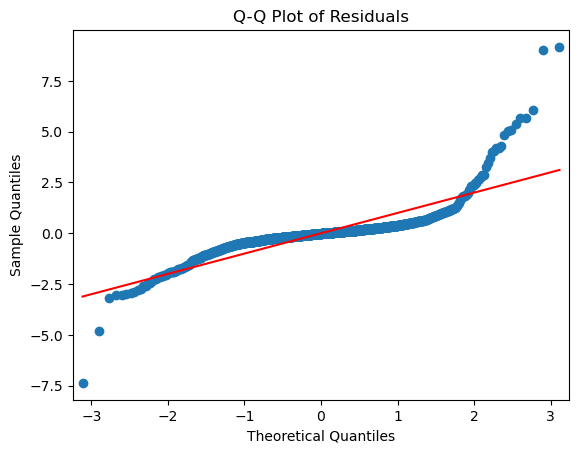

In [34]:
sm.qqplot(residuals_tr, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [35]:
r2 = r2_score(y_train, y_tr_pred)
print(f"Train R-squared: {r2:.2f}")

n,p = X_train.shape
print(X_train.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_train, y_tr_pred)
print(f"Train Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Train Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_train, y_tr_pred)
print(f"Train Median Absolute Error: {mae}")


Train R-squared: 0.64
(1085, 29)
Adjusted R-squared: 0.6345827556849823
Train Mean Squared Error: 340797499176832.94
Train Root Mean Square Error: 18460701.48
Train Median Absolute Error: 4689751.941280603


In [36]:
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {r2:.2f}")

n,p = X_test.shape
print(X_test.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Test Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_test, y_test_pred)
print(f"Test Median Absolute Error: {mae}")

Test R-squared: 0.68
(272, 29)
Adjusted R-squared: 0.6452948650060667
Test Mean Squared Error: 290892872334522.25
Test Root Mean Square Error: 17055581.85
Test Median Absolute Error: 4782502.155049622


## Need to perform some feature transformation

In [37]:
X1 = final_df1.drop(['domestic_opening','postive_Neut_ratio','negative_Neut_ratio','WeightedAvg_Neut_Sentiment',
                   'movie_searched','Comment_volume','Positive_Comments','Negative_Comments']
                    , axis=1)  # Features
y1 = final_df1['domestic_opening']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

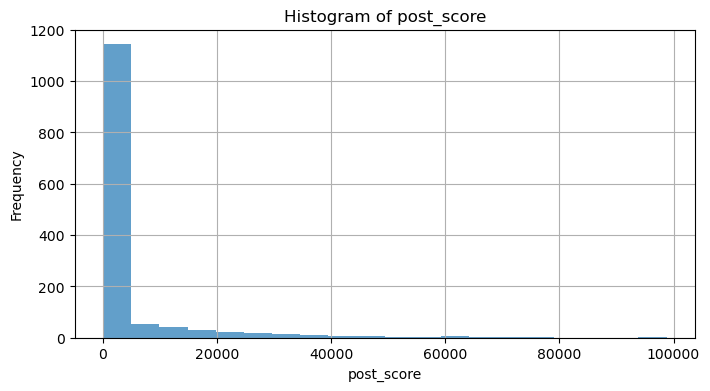

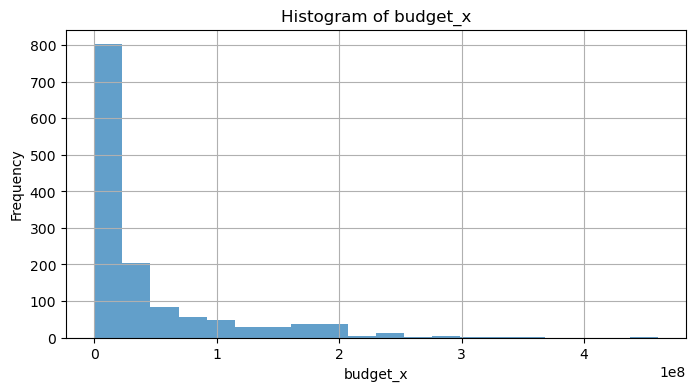

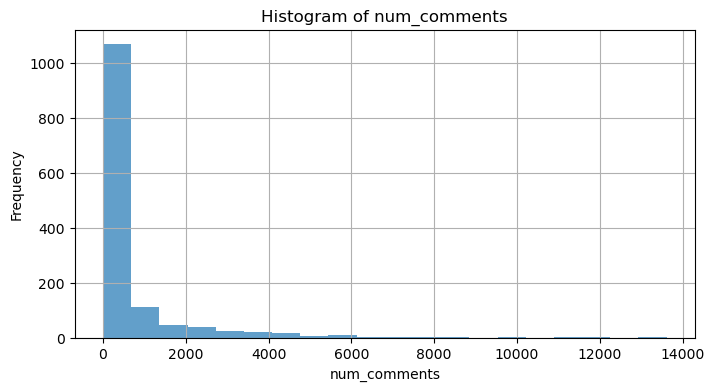

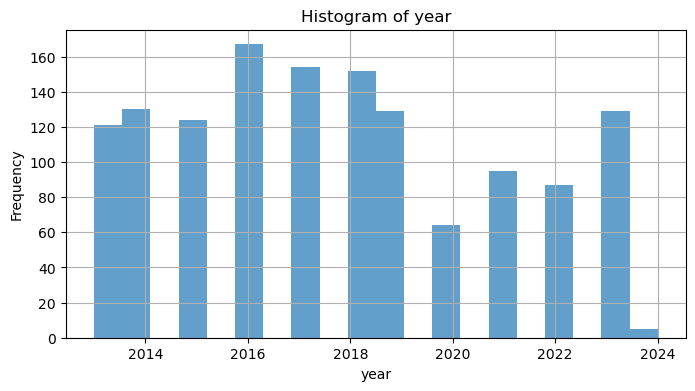

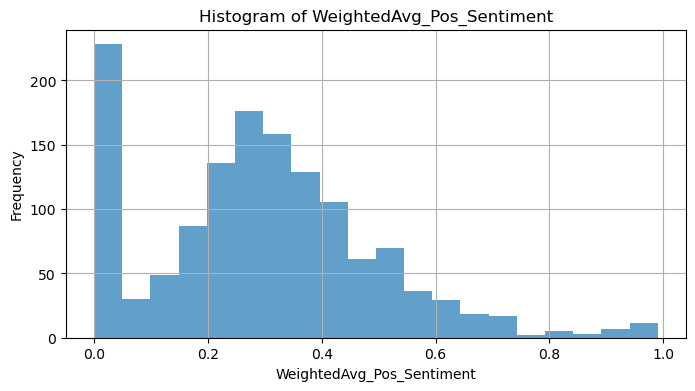

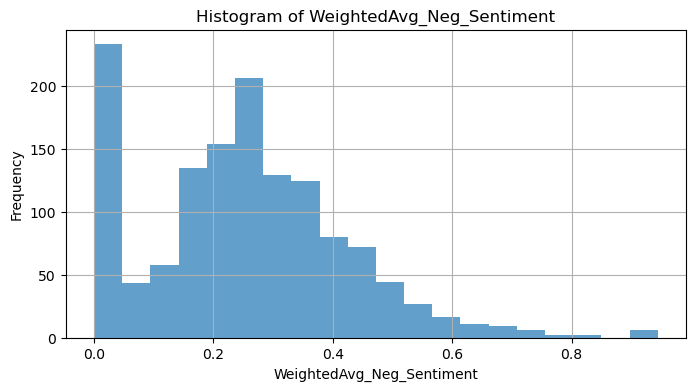

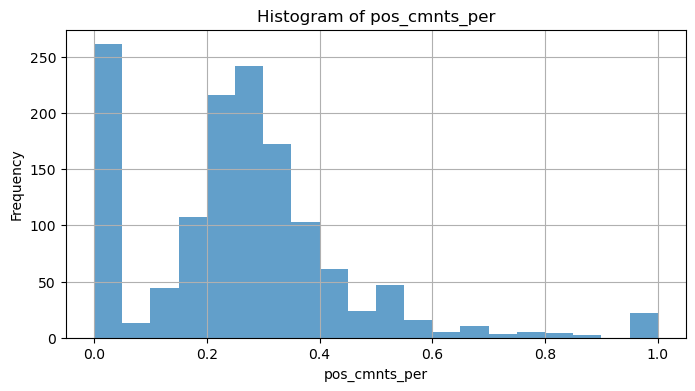

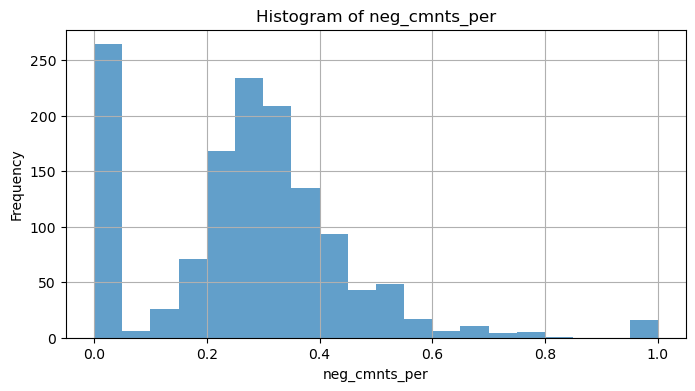

In [38]:
columns_to_plot =['post_score','budget_x','num_comments','year',
                      'WeightedAvg_Pos_Sentiment','WeightedAvg_Neg_Sentiment',
                       'pos_cmnts_per','neg_cmnts_per']

# Plot a histogram for each specified variable
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(X1[column], bins=20, alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [39]:

#apply log on post score

#apply sqrt on budget

#apply log on target,
y_train_log = np.log(y_train1 + 1)  # The +1 ensures we don't take the log of zero
y_test_log = np.log(y_test1 + 1)

#apply box-cox on target
y_train_box, lambda_val1 = boxcox(y_train1 + 1)
y_test_box = boxcox(y_test1 + 1, lmbda=lambda_val1)


X_train1['post_score_log'] = np.log(X_train1['post_score'] + 1)
X_test1['post_score_log'] = np.log(X_test1['post_score'] + 1)

# Apply sqrt transformation on 'budget'
X_train1['budget_sqrt'] = np.sqrt(X_train1['budget_x'])
X_test1['budget_sqrt'] = np.sqrt(X_test1['budget_x'])

#X_train['budget_log'] = np.log(X_train['budget_x'] + 1)
#X_val['budget_log'] = np.log(X_val['budget_x'] + 1)
#X_test['budget_log'] = np.log(X_test['budget_x'] + 1)


#apply box-cox on comments
X_train1['comments_boxcox'], lambda_val = boxcox(X_train1['num_comments'] + 1)
X_test1['comments_boxcox'] = boxcox(X_test1['num_comments'] + 1, lmbda=lambda_val)



In [40]:
#X_train = X_train.drop(['post_score','budget_x','num_comments'], axis=1)
#X_test = X_test.drop(['post_score','budget_x','num_comments'], axis=1)

# Retrain the model with new variables

In [41]:
model1 = LinearRegression()


scores1 = cross_val_score(model1, X_train1, y_train_log, cv=kf, scoring='neg_mean_squared_error')

print("Cross-validated scores:", scores1)
#print("Average MSE:", -np.mean(scores1))
#print("Average RMSE:", np.sqrt(-np.mean(scores1)))

average_mse_log = -np.mean(scores1)  # Make sure this is positive since scores are negative
rmse_log = np.sqrt(average_mse_log)

# Convert RMSE to the original scale using the exp transformation
rmse_original = np.exp(rmse_log) - 1

print("Average RMSE on log scale:", rmse_log)
print("Estimated RMSE on original scale:", rmse_original)

model1.fit(X_train1, y_train_log)
# Predict on the testing set
y_tr_pred1 = model1.predict(X_train1)

Cross-validated scores: [-2.90070767 -2.78697308 -3.12303911 -2.61235702 -2.66959452]
Average RMSE on log scale: 1.6788490940092646
Estimated RMSE on original scale: 4.359384272814706


In [42]:
residuals_tr1 = y_train_log - y_tr_pred1

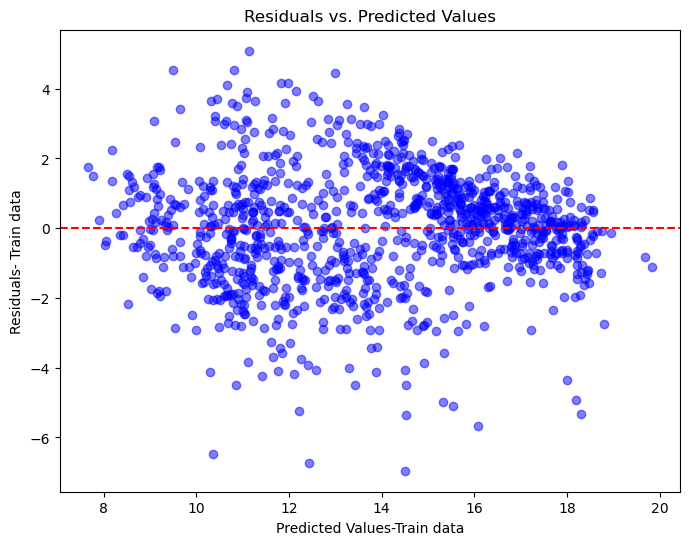

In [43]:

plt.figure(figsize=(8, 6))
plt.scatter(y_tr_pred1, residuals_tr1, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Predicted Values')
plt.show()

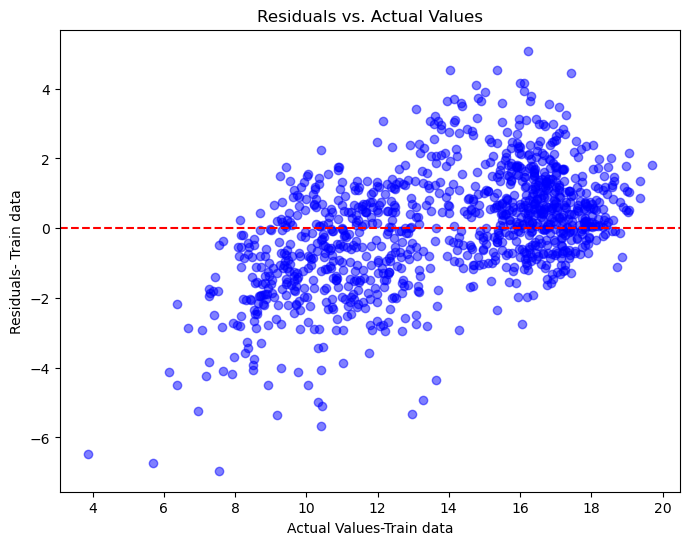

In [44]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train_log, residuals_tr1, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Actual Values')
plt.show()

## Transformation seems to improve but still there seems to be non linear relationship between target and predictors

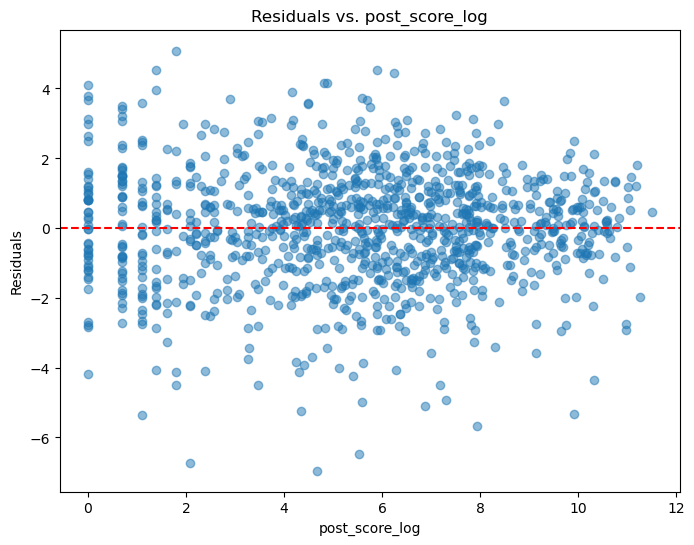

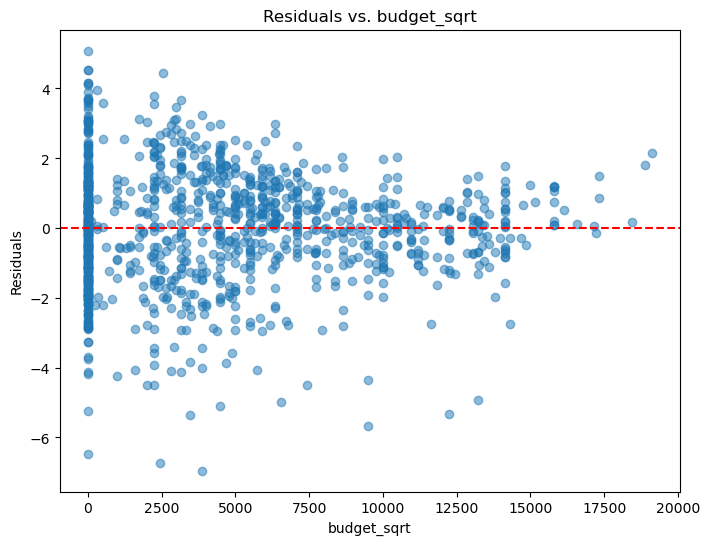

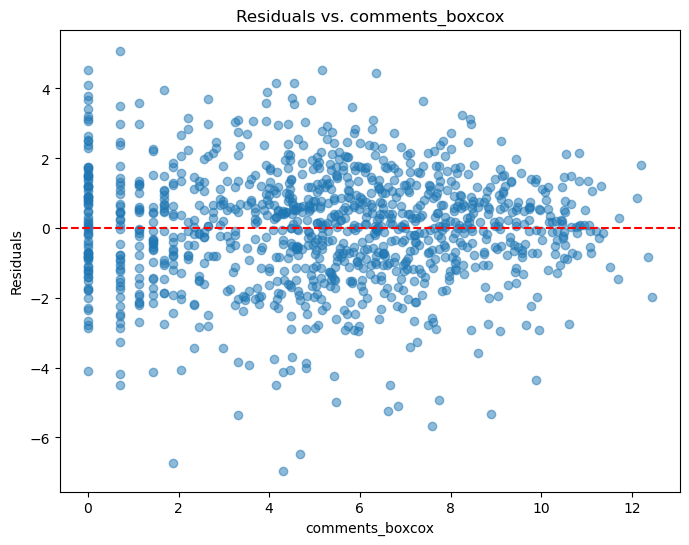

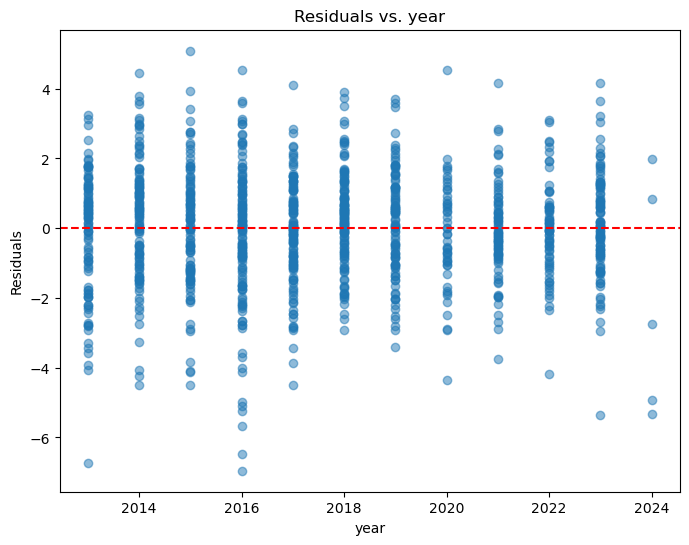

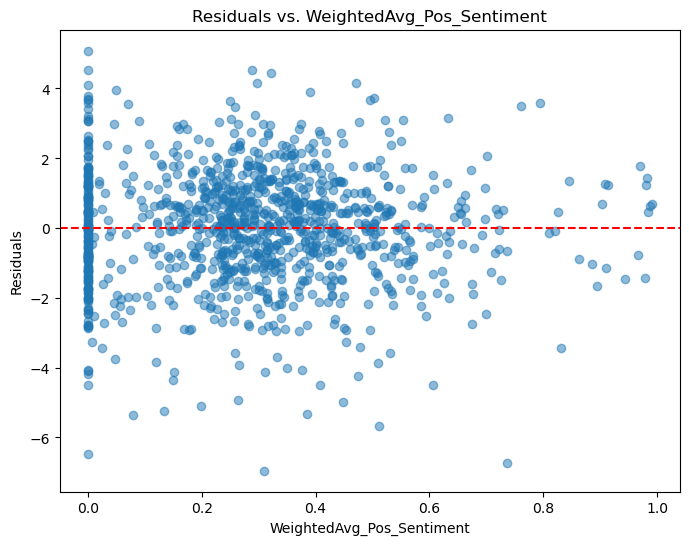

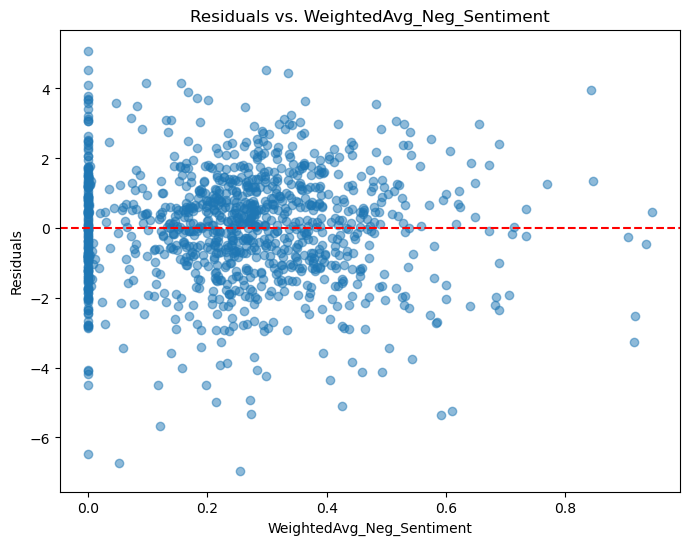

In [45]:
numerical_variables = ['post_score_log','budget_sqrt','comments_boxcox',
                       'year','WeightedAvg_Pos_Sentiment','WeightedAvg_Neg_Sentiment']

for column in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train1[column], residuals_tr1, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {column}')
    plt.show()

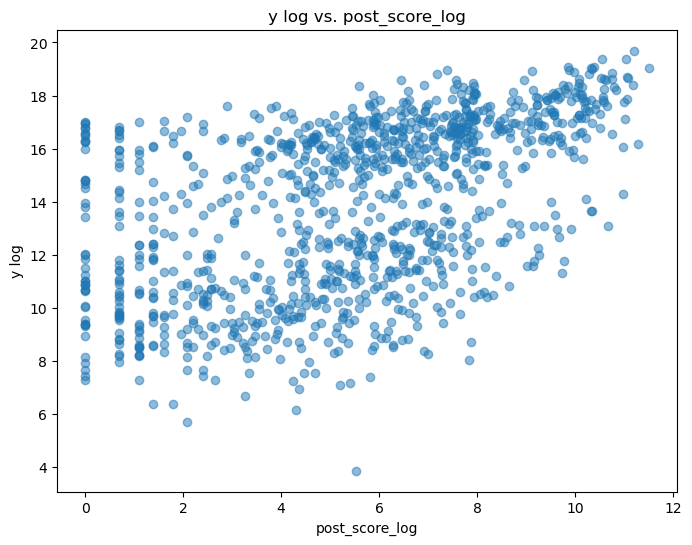

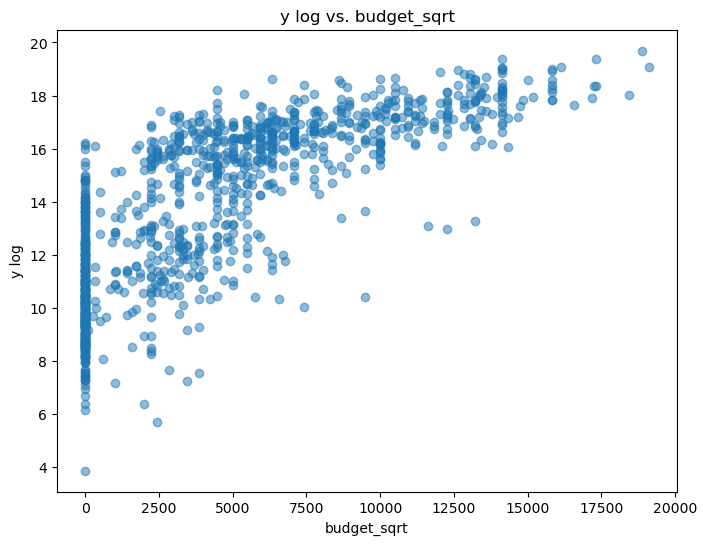

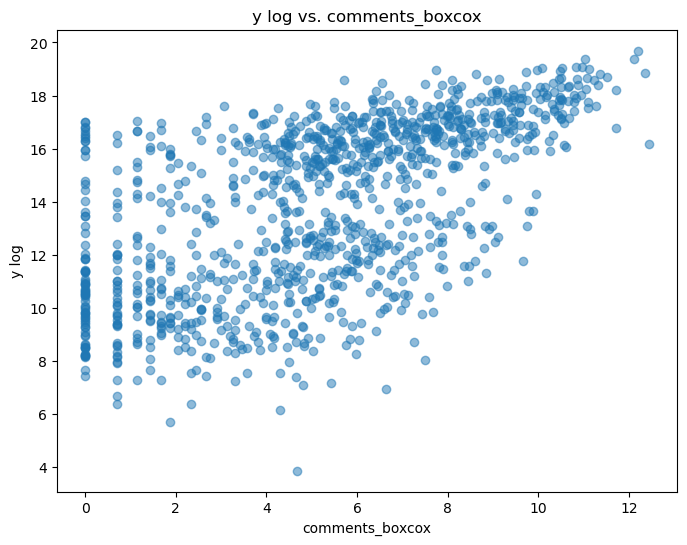

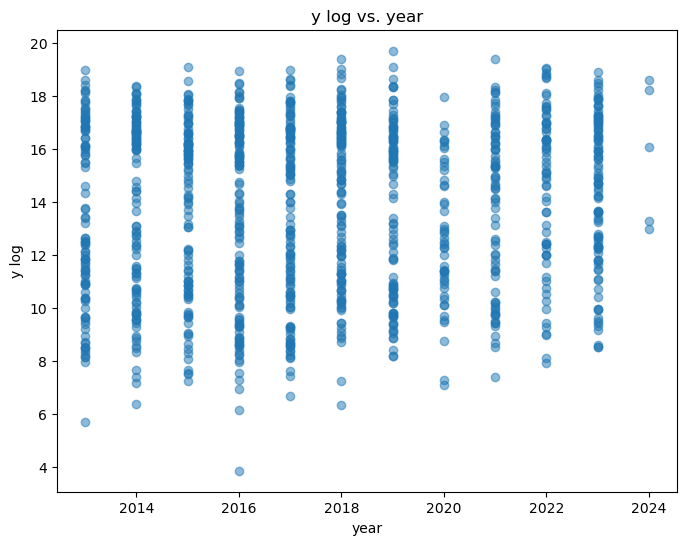

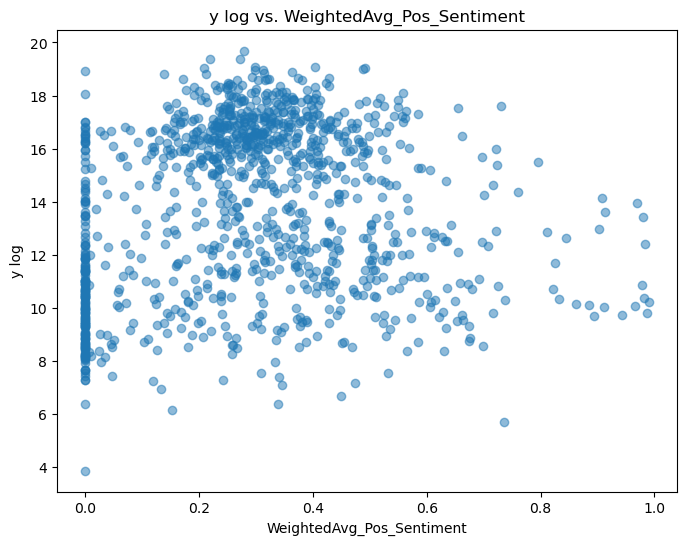

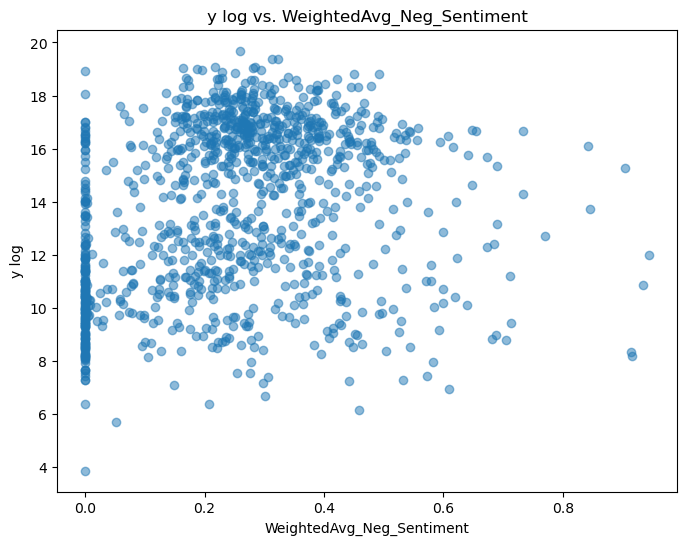

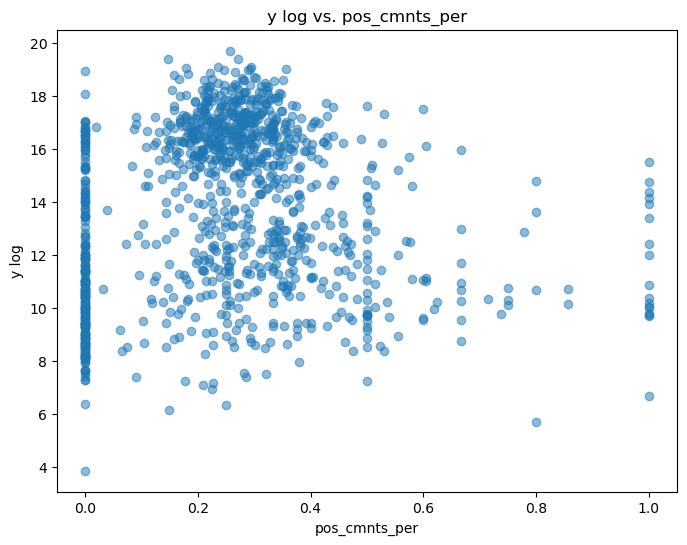

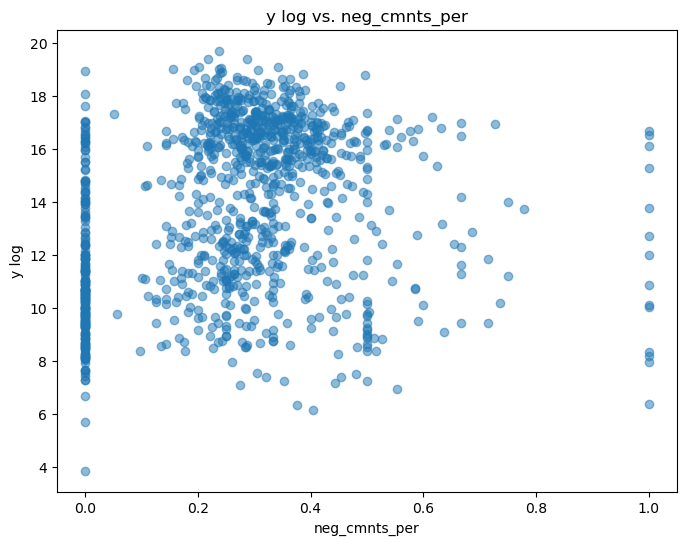

In [46]:
numerical_variables = ['post_score_log','budget_sqrt','comments_boxcox',
                       'year','WeightedAvg_Pos_Sentiment','WeightedAvg_Neg_Sentiment','pos_cmnts_per','neg_cmnts_per']

for column in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train1[column],y_train_log , alpha=0.5)
    #plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(column)
    plt.ylabel('y log')
    plt.title(f'y log vs. {column}')
    plt.show()

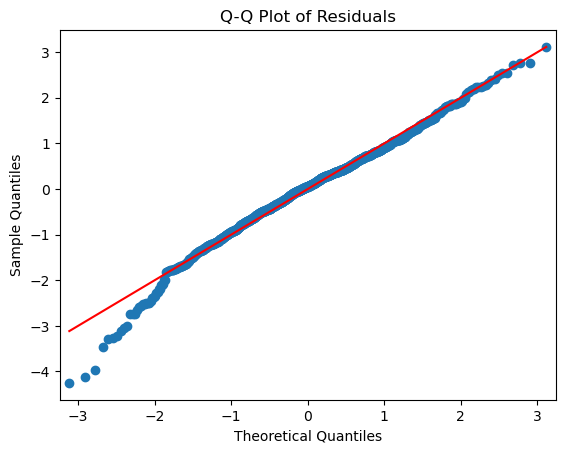

In [47]:
sm.qqplot(residuals_tr1, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [48]:
r2 = r2_score(y_train_log, y_tr_pred1)
print(f"Train R-squared: {r2:.2f}")
n,p = X_train.shape
print(X_train.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_train1, np.exp(y_tr_pred1) - 1)
print(f"Train Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Train Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_train1, np.exp(y_tr_pred1) - 1)
print(f"Train Median Absolute Error: {mae}")

Train R-squared: 0.74
(1085, 29)
Adjusted R-squared: 0.7320887085150575
Train Mean Squared Error: 651717428579107.12
Train Root Mean Square Error: 25528756.89
Train Median Absolute Error: 1409706.229121252


In [49]:
y_test_pred1 = model1.predict(X_test1)

r2 = r2_score(y_test_log, y_test_pred1)
print(f"Test R-squared: {r2:.2f}")

n,p = X_test1.shape
print(X_test1.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_test1, np.exp(y_test_pred1) - 1)
print(f"Test Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Test Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_test1, np.exp(y_test_pred1) - 1)
print(f"Test Median Absolute Error: {mae}")

Test R-squared: 0.71
(272, 32)
Adjusted R-squared: 0.667512917726436
Test Mean Squared Error: 555351477443524.94
Test Root Mean Square Error: 23565896.49
Test Median Absolute Error: 1453946.3762237378


## Removing outliers <=10,000 earnings on opening weekend

In [50]:
final_df2 = final_df[final_df['domestic_opening']>10000]

percentile_99 = final_df2['budget_x'].quantile(0.99)
final_df2 = final_df2[final_df2['budget_x']<=percentile_99]

In [51]:
X2 = final_df2.drop(['domestic_opening','postive_Neut_ratio','negative_Neut_ratio','WeightedAvg_Neut_Sentiment',
                   'movie_searched','Comment_volume','Positive_Comments','Negative_Comments']
                    , axis=1)  # Features
y2 = final_df2['domestic_opening']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

In [52]:
#apply log on post score

#apply sqrt on budget

#apply log on target,
y_train_log2 = np.log(y_train2 + 1)  # The +1 ensures we don't take the log of zero
y_val_log2 = np.log(y_val2 + 1)
y_test_log2 = np.log(y_test2 + 1)

X_train2['post_score_log'] = np.log(X_train2['post_score'] + 1)
X_val2['post_score_log'] = np.log(X_val2['post_score'] + 1)
X_test2['post_score_log'] = np.log(X_test2['post_score'] + 1)

# Apply sqrt transformation on 'budget'
X_train2['budget_sqrt'] = np.sqrt(X_train2['budget_x'])
X_val2['budget_sqrt'] = np.sqrt(X_val2['budget_x'])
X_test2['budget_sqrt'] = np.sqrt(X_test2['budget_x'])

#apply box-cox on comments
X_train2['comments_boxcox'], lambda_val2 = boxcox(X_train2['num_comments'] + 1)
X_val2['comments_boxcox'] = boxcox(X_val2['num_comments'] + 1, lmbda=lambda_val2)
X_test2['comments_boxcox'] = boxcox(X_test2['num_comments'] + 1, lmbda=lambda_val2)

In [53]:
print(X_train2.shape)
print(X_val2.shape)

(851, 32)
(183, 32)


## Retrain model

In [54]:
model4 = LinearRegression()
model4.fit(X_train2, y_train_log2)

# Predict on the testing set
y_tr_pred4 = model4.predict(X_train2)
residuals_tr4 = y_train_log2 - y_tr_pred4

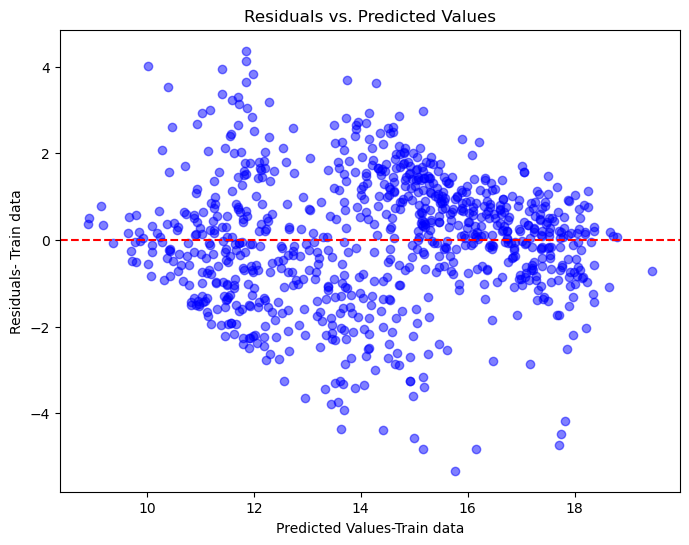

In [55]:

plt.figure(figsize=(8, 6))
plt.scatter(y_tr_pred4, residuals_tr4, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Predicted Values')
plt.show()

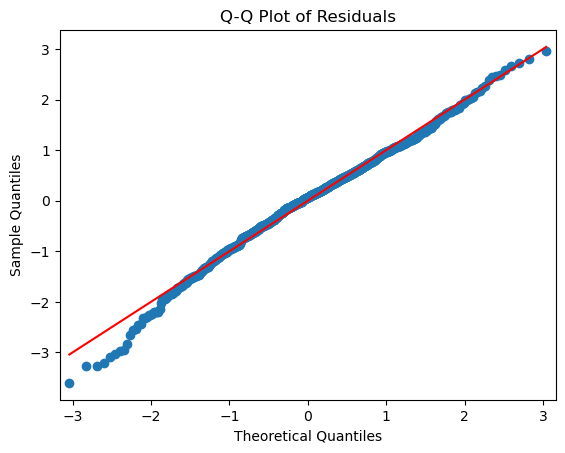

In [56]:
sm.qqplot(residuals_tr4, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()
#normality is almost fixed

In [57]:
r2 = r2_score(y_train_log2, y_tr_pred4)
print(f"Train R-squared: {r2:.2f}")
n,p = X_train2.shape
print(X_train2.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_train2, np.exp(y_tr_pred4) - 1)
print(f"Train Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Train Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_train2, np.exp(y_tr_pred4) - 1)
print(f"Train Median Absolute Error: {mae}")

Train R-squared: 0.71
(851, 32)
Adjusted R-squared: 0.7017017586520287
Train Mean Squared Error: 422494923700449.75
Train Root Mean Square Error: 20554681.31
Train Median Absolute Error: 1903990.0014949827


In [224]:
y_val_pred4 = model4.predict(X_val2)

r2 = r2_score(y_val_log2, y_val_pred4)
print(f"Test R-squared: {r2:.2f}")

n,p = X_val2.shape
print(X_val2.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_val2, np.exp(y_val_pred4) - 1)
print(f"Test Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Test Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_val2, np.exp(y_val_pred4) - 1)
print(f"Test Median Absolute Error: {mae}")

Test R-squared: 0.72
(184, 32)
Adjusted R-squared: 0.6575734546608254
Test Mean Squared Error: 471084487365166.62
Test Root Mean Square Error: 21704480.81
Test Median Absolute Error: 1489333.893561435


## Removing influential points

In [73]:
final_df2 = final_df[final_df['domestic_opening']>10000]
percentile_99 = final_df2['budget_x'].quantile(0.99)
final_df2 = final_df2[final_df2['budget_x']<=percentile_99]

In [74]:
X2 = final_df2.drop(['domestic_opening','postive_Neut_ratio','negative_Neut_ratio','WeightedAvg_Neut_Sentiment',
                   'movie_searched','Comment_volume','Positive_Comments','Negative_Comments']
                    , axis=1)  # Features

Movie_titles = final_df2['movie_searched']

y2 = final_df2['domestic_opening']

In [75]:
X2.shape

(1217, 29)

In [76]:
#X2_s = sm.add_constant(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [77]:
train_ind = X_train2.index
Movie_titles_tr = Movie_titles.loc[train_ind]
#Movie_titles_tr[:5]

In [78]:
print(X_train2.shape)
print(X_test2.shape)

(973, 29)
(244, 29)


In [79]:
y_train_log2 = np.log(y_train2 + 1)  
y_test_log2 = np.log(y_test2 + 1)

X_train2['post_score_log'] = np.log(X_train2['post_score'] + 1)
X_test2['post_score_log'] = np.log(X_test2['post_score'] + 1)

# Apply sqrt transformation on 'budget'
X_train2['budget_sqrt'] = np.sqrt(X_train2['budget_x'])
X_test2['budget_sqrt'] = np.sqrt(X_test2['budget_x'])

#apply box-cox on comments
X_train2['comments_boxcox'], lambda_val3 = boxcox(X_train2['num_comments'] + 1)
X_test2['comments_boxcox'] = boxcox(X_test2['num_comments'] + 1, lmbda=lambda_val3)


In [80]:
print(X_train2.shape)
print(X_test2.shape)

(973, 32)
(244, 32)


In [81]:
model_ols = sm.OLS(y_train_log2, X_train2).fit()

influence = model_ols.get_influence()
cooks_d = influence.cooks_distance[0]


In [82]:
n = len(y_train_log2)
threshold = 4 / n
outliers = np.where(cooks_d > threshold)[0]
print(len(outliers))

48


In [83]:
outliers

array([ 55,  67,  75,  80,  89, 110, 138, 188, 215, 240, 250, 255, 261,
       269, 280, 292, 323, 334, 338, 368, 393, 413, 424, 454, 470, 486,
       505, 513, 518, 522, 540, 552, 619, 642, 675, 689, 744, 777, 779,
       797, 810, 844, 851, 879, 880, 889, 899, 923])

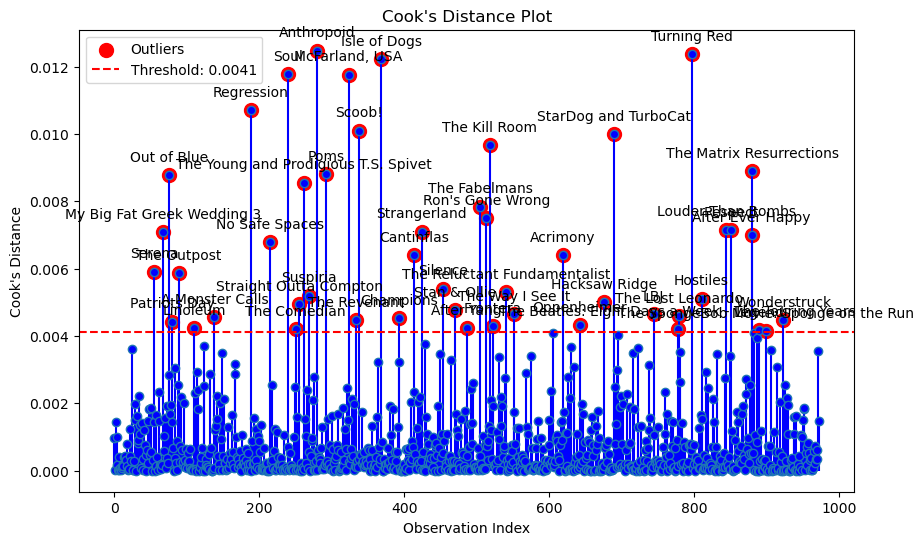

In [84]:
observation_indices = np.arange(len(cooks_d))
Movie_titles_tr1 = Movie_titles_tr.reset_index(drop=True)
plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(observation_indices, cooks_d, basefmt=" ")

# Set properties for the lines in the stem plot
plt.setp(stemlines, 'color', 'blue', 'linewidth', 1.5)
plt.setp(markerline, 'markerfacecolor', 'blue')

# Highlight outliers in red and add labels
for outlier in outliers:
    plt.scatter(outlier, cooks_d[outlier], color='red', s=100, label='Outliers' if outlier == outliers[0] else "")
    # Label the outlier with the movie title
    plt.annotate(Movie_titles_tr1[outlier],  # Fetching title from the series
                 (outlier, cooks_d[outlier]), 
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

# Add labels and title
plt.title('Cook\'s Distance Plot')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.4f}')

# Adding a legend to explain colors
plt.legend()

# Show the plot
plt.show()

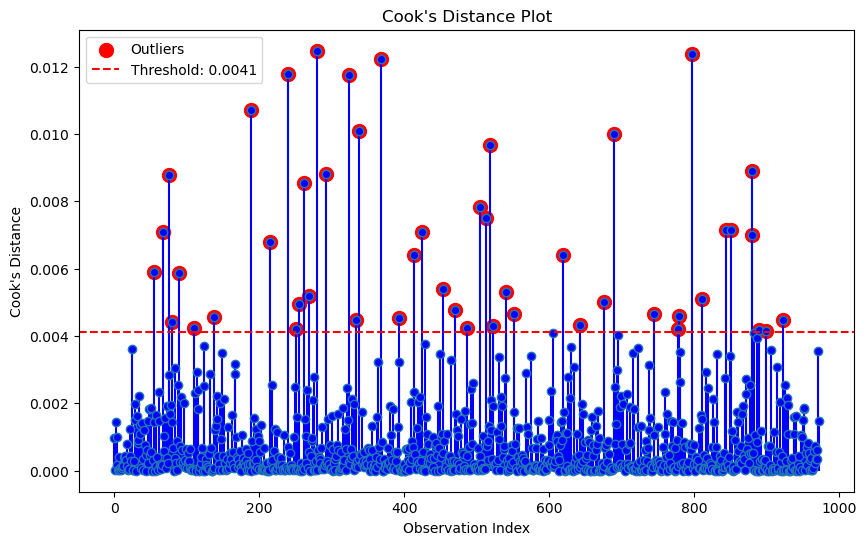

In [85]:
observation_indices = np.arange(len(cooks_d))

plt.figure(figsize=(10, 6))
(markerline, stemlines, baseline) = plt.stem(observation_indices, cooks_d, basefmt=" ")

# Set properties for the lines in the stem plot
plt.setp(stemlines, 'color', 'blue', 'linewidth', 1.5)
plt.setp(markerline, 'markerfacecolor', 'blue')

# Highlight outliers in red
plt.scatter(outliers, cooks_d[outliers], color='red', s=100, label='Outliers')

# Add labels and title
plt.title('Cook\'s Distance Plot')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.4f}')

# Adding a legend to explain colors
plt.legend()

# Show the plot
plt.show()

In [86]:
X_train2.reset_index(drop=True, inplace=True)
y_train_log2.reset_index(drop=True, inplace=True)

# Remove outliers
X_clean = X_train2.drop(index=outliers)
y_clean = y_train_log2.drop(index=outliers)

# Add a constant to the model if needed
#X_clean = sm.add_constant(X_clean, has_constant='add')

# Refit the model with cleaned data
model_clean = sm.OLS(y_clean, X_clean).fit()

# Print the summary of the new model
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:       domestic_opening   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.97e-272
Time:                        20:32:00   Log-Likelihood:                -1543.2
No. Observations:                 925   AIC:                             3146.
Df Residuals:                     895   BIC:                             3291.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
post_sco

In [87]:
y_tr_pred2 = model_clean.predict(X_clean)
residuals_tr2 = y_clean - y_tr_pred2

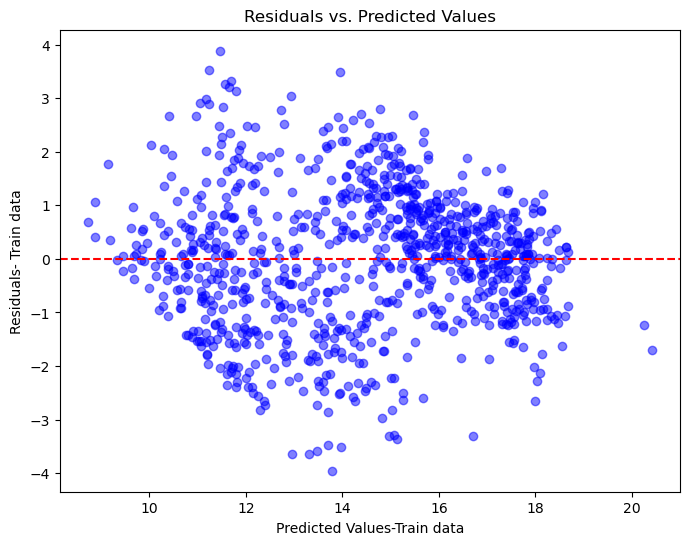

In [88]:

plt.figure(figsize=(8, 6))
plt.scatter(y_tr_pred2, residuals_tr2, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Predicted Values')
plt.show()

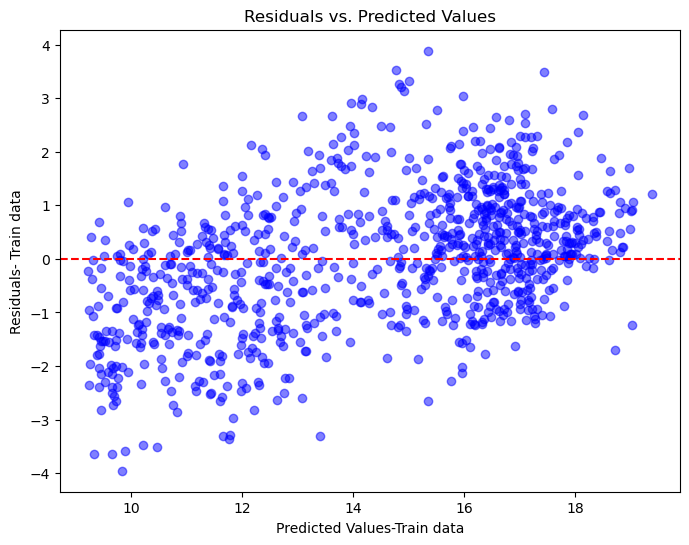

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_clean, residuals_tr2, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values-Train data')
plt.ylabel('Residuals- Train data')
plt.title('Residuals vs. Predicted Values')
plt.show()

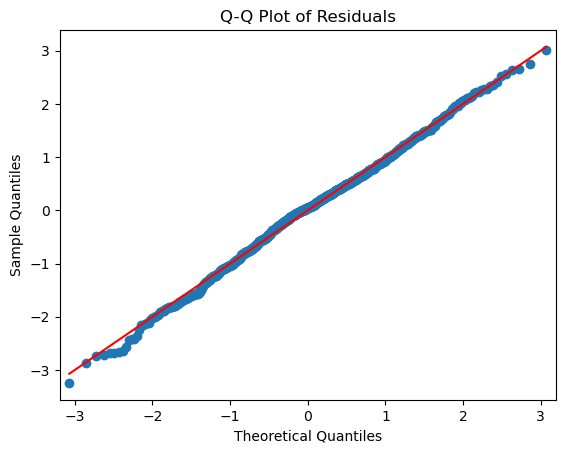

In [93]:
sm.qqplot(residuals_tr2, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [94]:


r2 = r2_score(y_clean, y_tr_pred2)
print(f"Train R-squared: {r2:.2f}")
n,p = X_clean.shape
print(X_clean.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(np.exp(y_clean) - 1, np.exp(y_tr_pred2) - 1)
print(f"Train Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Train Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(np.exp(y_clean) - 1, np.exp(y_tr_pred2) - 1)
print(f"Train Median Absolute Error: {mae}")

Train R-squared: 0.77
(936, 32)
Adjusted R-squared: 0.7633473249949317
Train Mean Squared Error: 714045481127055.38
Train Root Mean Square Error: 26721629.46
Train Median Absolute Error: 2167160.837257919


In [95]:

y_test_pred2 = model_clean.predict(X_test2)

r2 = r2_score(y_test_log2, y_test_pred2)
print(f"Test R-squared: {r2:.2f}")

n,p = X_test2.shape
print(X_test2.shape)

Adjusted_R_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {Adjusted_R_squared}")

# Mean Squared Error
mse = mean_squared_error(y_test2, np.exp(y_test_pred2) - 1)
print(f"Test Mean Squared Error: {mse:.2f}")

# Root Mean Square Error
rmse = np.sqrt(mse)
print(f"Test Root Mean Square Error: {rmse:.2f}")

#Median absolute Error
mae = median_absolute_error(y_test2, np.exp(y_test_pred2) - 1)
print(f"Test Median Absolute Error: {mae}")

Test R-squared: 0.75
(246, 32)
Adjusted R-squared: 0.7163696652829568
Test Mean Squared Error: 473097868364650.56
Test Root Mean Square Error: 21750813.05
Test Median Absolute Error: 1576770.219783687
